In [2]:

import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql.functions import isnull, isnan
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Visualization').getOrCreate()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Draw inline
%matplotlib inline

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)


In [3]:
session= spark.read.csv('sessions.csv',header=True,inferSchema=True)
train_users = spark.read.csv('train_users_2.csv',header=True,inferSchema=True)

In [4]:
session.select("action","action_type","action_detail","device_type").na.fill("NaN")
session.select("secs_elapsed").na.fill(19402)

DataFrame[secs_elapsed: double]

In [5]:
from pyspark.sql.functions import *
train_users = train_users.withColumn('gender', regexp_replace('gender', 'OTHER', 'NaN'))
train_users = train_users.withColumn('gender', regexp_replace('gender', '-unknown-', 'NaN'))


In [ ]:
train_users.filter('age>114 OR age<18').drop()
train_users.select('age').describe().show()

In [7]:
train_users.na.fill("NaN")

DataFrame[id: string, date_account_created: timestamp, timestamp_first_active: bigint, date_first_booking: timestamp, gender: string, age: double, signup_method: string, signup_flow: int, language: string, affiliate_channel: string, affiliate_provider: string, first_affiliate_tracked: string, signup_app: string, first_device_type: string, first_browser: string, country_destination: string]

In [8]:
session_new=session.groupBy("user_id").sum("secs_elapsed")
new_train=train_users.join(session_new,train_users.id== session_new.user_id)
new_train.drop('user_id')

DataFrame[id: string, date_account_created: timestamp, timestamp_first_active: bigint, date_first_booking: timestamp, gender: string, age: double, signup_method: string, signup_flow: int, language: string, affiliate_channel: string, affiliate_provider: string, first_affiliate_tracked: string, signup_app: string, first_device_type: string, first_browser: string, country_destination: string, sum(secs_elapsed): double]

In [9]:
df_train=new_train.toPandas()

Change to pandas to visual

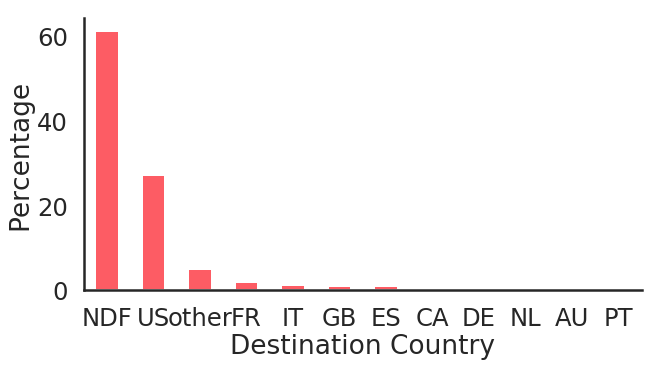

In [10]:
df_train=new_train.toPandas()
plt.figure(figsize=(10,5))
country_share = df_train['country_destination'].value_counts() / df_train.shape[0] * 100
country_share.plot(kind='bar',color='#FD5C64', rot=0)
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

In [14]:
classes = ['NDF','US','other','FR','IT','GB','ES','CA','DE','NL','AU','PT']
def stacked_bar(feature):
    ctab = pd.crosstab([df_train[feature].fillna('Unknown')], df_train.country_destination, dropna=False).apply(lambda x: x/x.sum(), axis=1)
    ctab[classes].plot(kind='bar', stacked=True, colormap='terrain', legend=False)

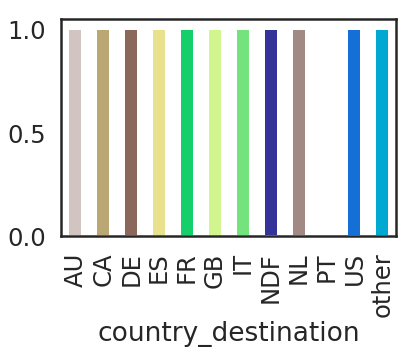

In [33]:
stacked_bar('country_destination')

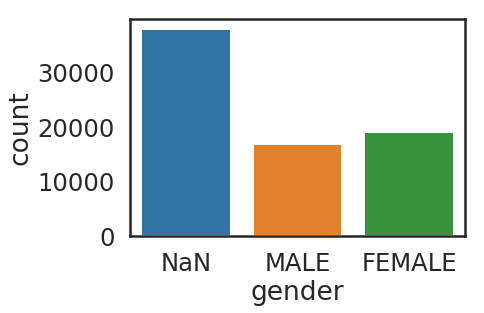

In [12]:
sns.countplot(df_train['gender'].fillna('Unknown'))


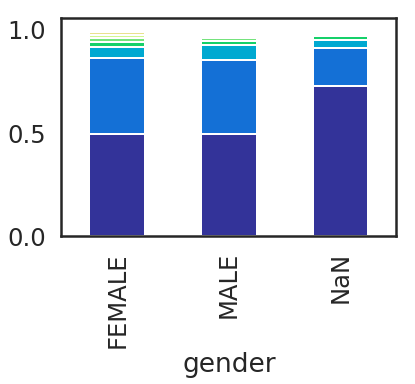

In [15]:
stacked_bar('gender')

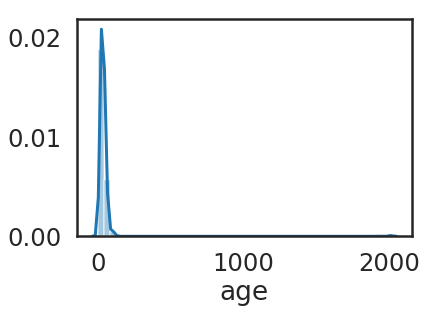

In [13]:
sns.distplot(df_train['age'].dropna())

(10, 75)

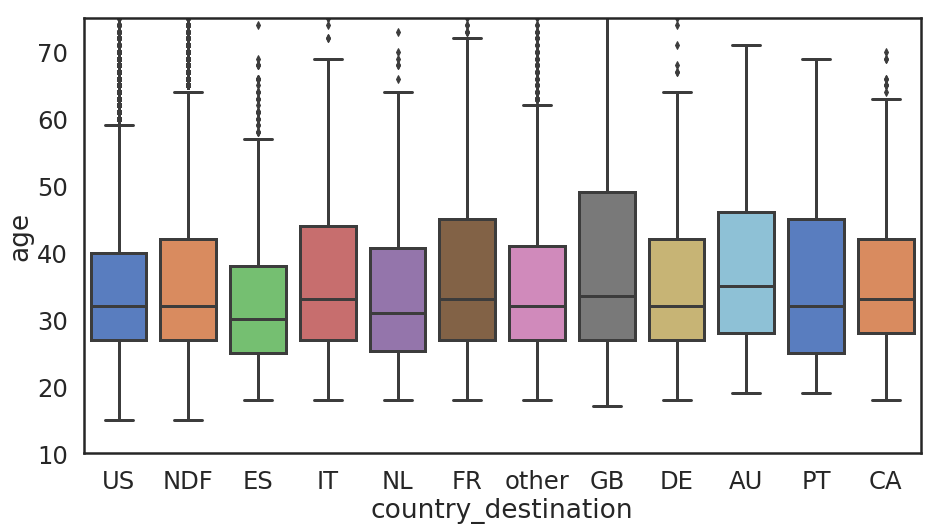

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='country_destination', y='age', data=df_train, palette="muted", ax =ax)
ax.set_ylim([10, 75])

In [17]:
def set_age_group(x):
    if x < 40:
        return 'Young'
    elif x >=40 and x < 60:
        return 'Middle'
    elif x >= 60 and x <= 125:
        return 'Old'
    else:
        return 'Unknown'

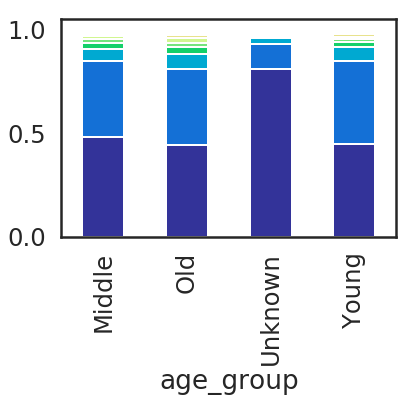

In [18]:
df_train['age_group'] = df_train['age'].apply(set_age_group)
stacked_bar('age_group')

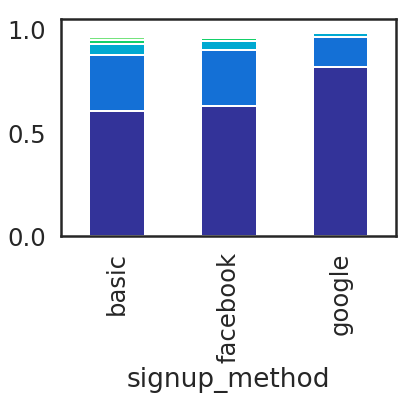

In [19]:
stacked_bar('signup_method')

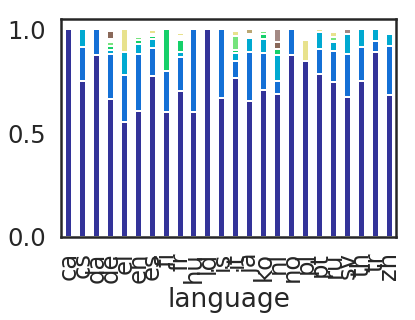

In [20]:
stacked_bar('language')

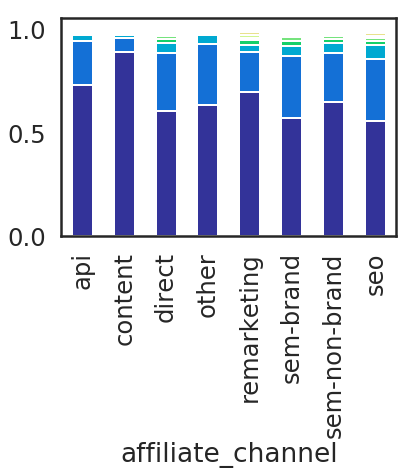

In [21]:
stacked_bar('affiliate_channel')

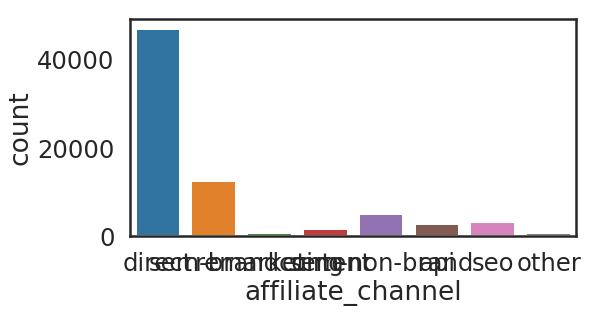

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(df_train['affiliate_channel'])

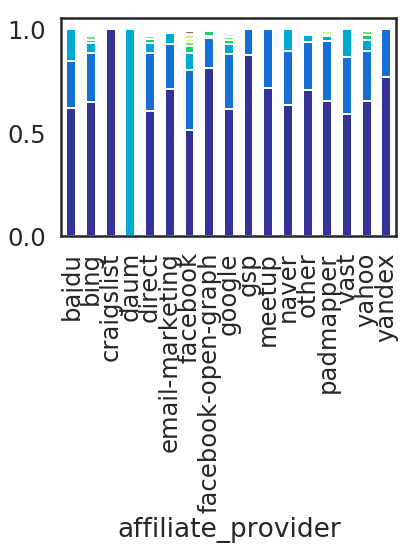

In [23]:
stacked_bar('affiliate_provider')


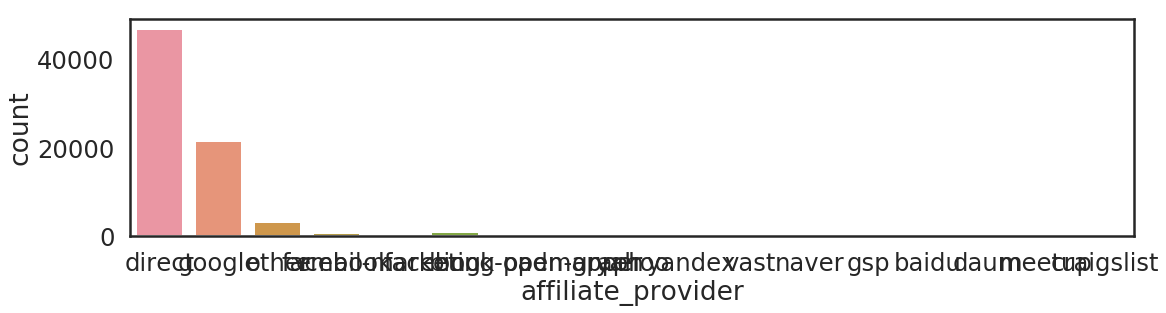

In [24]:
plt.figure(figsize=(18,4))
sns.countplot(df_train['affiliate_provider'])

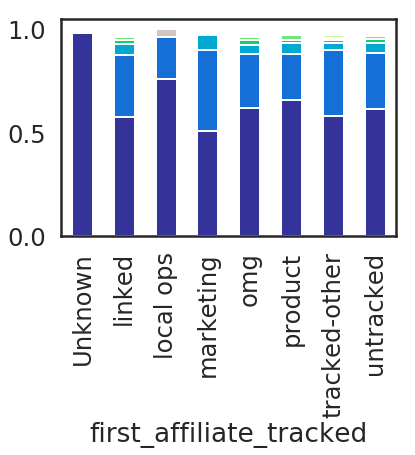

In [25]:
stacked_bar('first_affiliate_tracked')

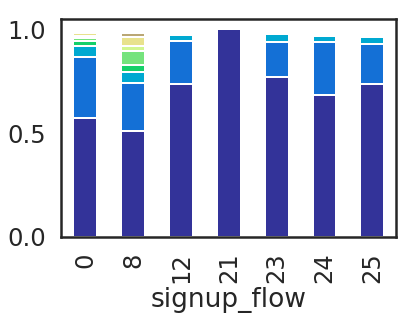

In [26]:
stacked_bar('signup_flow')

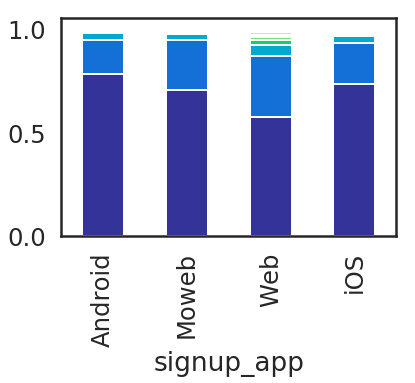

In [27]:
stacked_bar('signup_app')

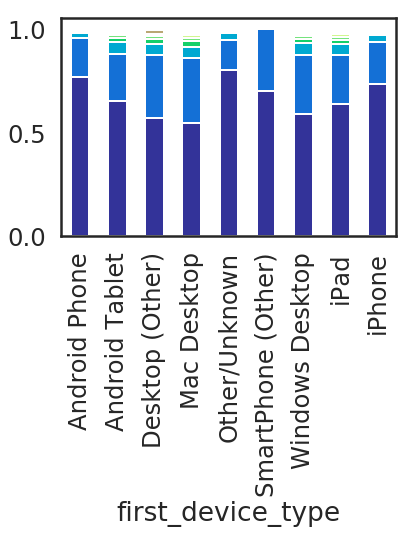

In [28]:
stacked_bar('first_device_type')

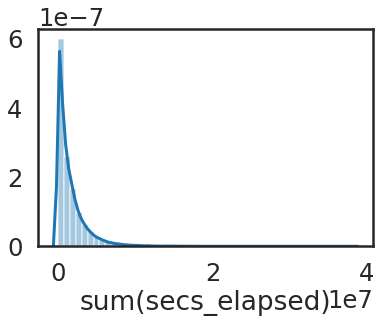

In [30]:
sns.distplot(df_train['sum(secs_elapsed)'].dropna())

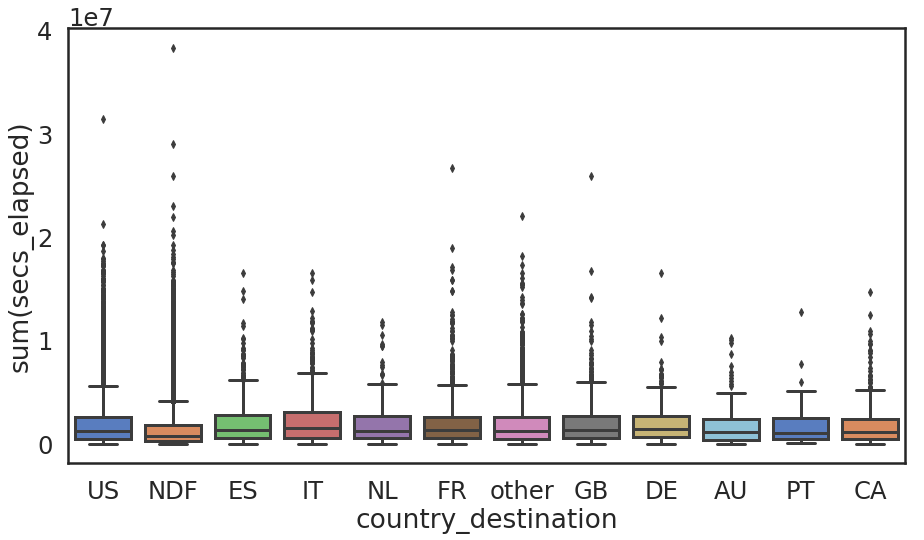

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='country_destination', y='sum(secs_elapsed)', data=df_train, palette="muted", ax =ax)
